In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import binned_statistic

%matplotlib inline

# Load Data

In [2]:
# df = pd.read_csv('../data/airborne_data.csv', parse_dates=['timestamp'], index_col='timestamp')
# df = pd.read_csv('../../data/airborne_data_20241015.csv', parse_dates=['timestamp'], index_col='timestamp')
df = pd.read_csv('../../data/processed/complete_data.csv', parse_dates=['timestamp'], index_col='timestamp')

/tmp/ipykernel_948607/1611110707.py:3: DtypeWarning: Columns (195) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/processed/complete_data.csv', parse_dates=['timestamp'], index_col='timestamp')


In [3]:
jw_df = pd.read_csv('../../data/figure01_JW_table1.csv',)
jw_df['age'] = (jw_df['plume_age_lower']+jw_df['plume_age_upper'])/2
jw_df['N'] = jw_df['N'].replace(np.nan, 1)

# Plot

### Figure 3

/home/jpalmo/.conda/envs/o3fire/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


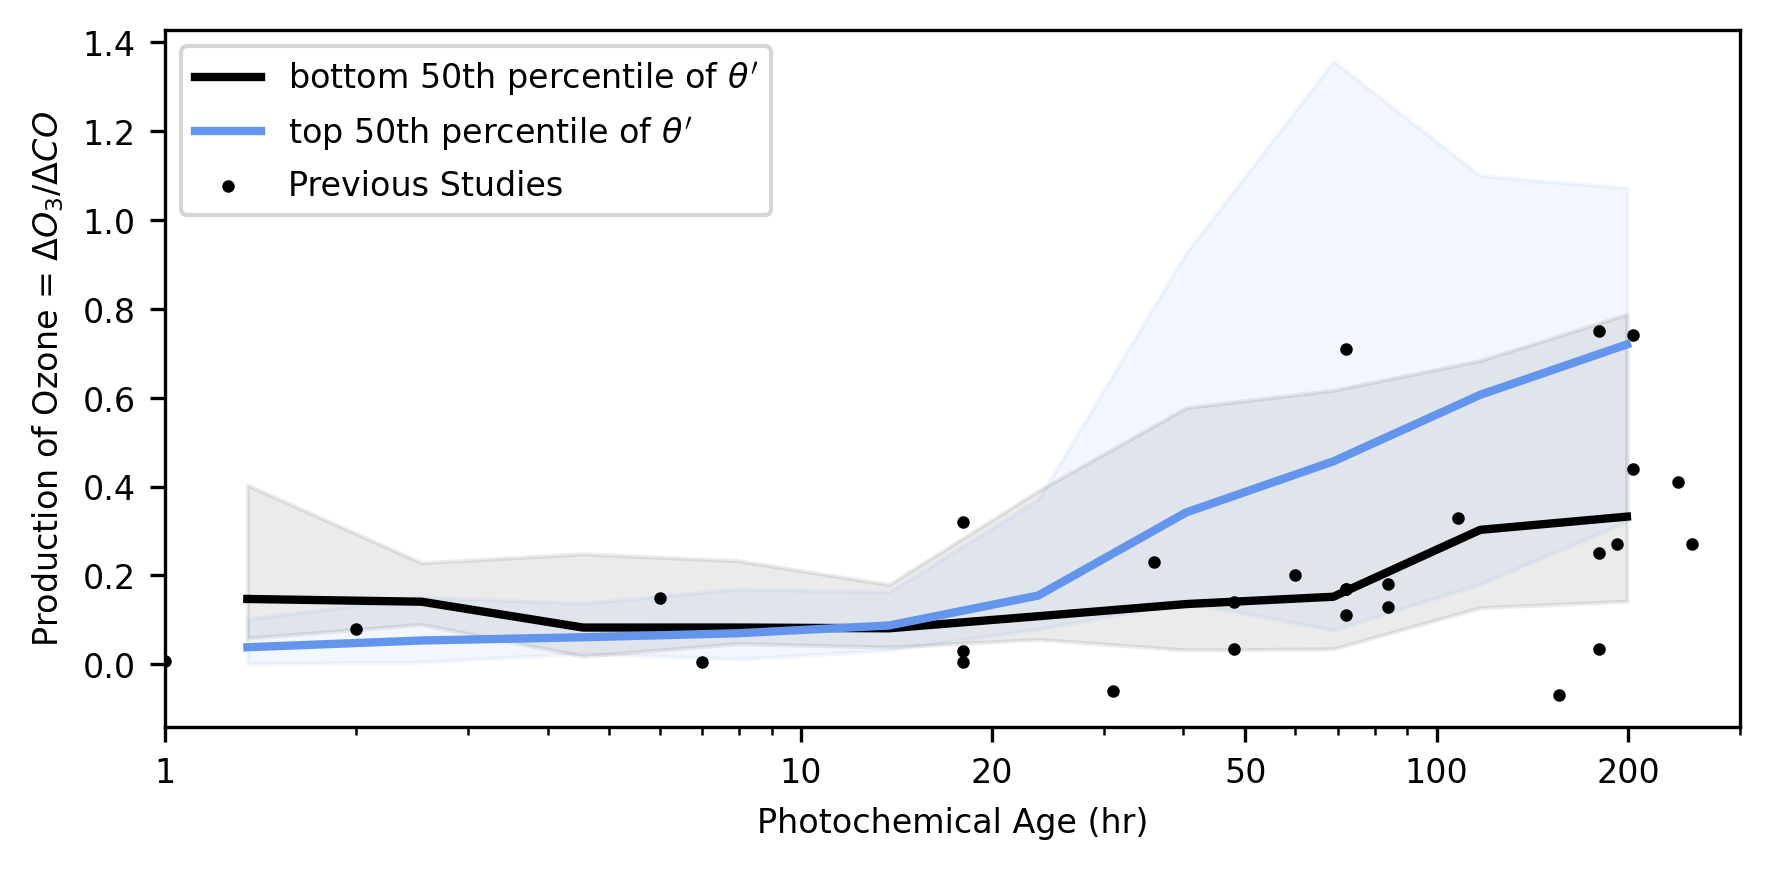

In [5]:
# first method
matplotlib.rcParams['font.family'] = ['sans-serif']

split_by = 'theta' 
y_var = 'O3/CO'

tmp = df#[(df['O3/CO']>0)]

fire = tmp[(tmp['regime'] == 'fire')]

fig, ax = plt.subplots(figsize=(6, 3), dpi=300)

log_bins = np.logspace(-0,2.3,11)

grouped_fire = fire.groupby(pd.cut(fire[split_by], np.nanpercentile(fire[split_by], [0,50,100]), include_lowest=True, labels=['bottom', 'top']))
bottom = grouped_fire.get_group('bottom')
top = grouped_fire.get_group('top')

# binned_scatterplot(bottom['age'], bottom[y_var], log_bins, show_raw=True, label=r'bottom 50th percentile of $\theta$ (N={})'.format(len(bottom[['age',y_var,split_by]].dropna())), c='k', marker='o', ax=axs[0])
bin_result = binned_statistic(bottom['age'].values, bottom['O3/CO'].values, statistic=lambda y:np.nanmedian(y), bins=log_bins,)
tenth_result = binned_statistic(bottom['age'].values, bottom['O3/CO'].values, statistic=lambda y:np.nanpercentile(y,16), bins=log_bins,)
ninetieth_result = binned_statistic(bottom['age'].values, bottom['O3/CO'].values, statistic=lambda y:np.nanpercentile(y,84), bins=log_bins,)
count_result = binned_statistic(bottom['age'].values, bottom['O3/CO'].values, statistic='count', bins=log_bins,)
bin_edges = (bin_result.bin_edges)
bin_centers = bin_result.bin_edges[1:] - (abs(bin_result.bin_edges[0]-bin_result.bin_edges[1]))/2

# ax.scatter(tmp['NOx'], tmp['O3/CO'], color=colors['fire'], alpha=0.1)
p = ax.plot(bin_centers, bin_result.statistic, label=r'bottom 50th percentile of $\theta ^\prime$', color='k', linewidth=2)
ax.fill_between(bin_centers, tenth_result.statistic, ninetieth_result.statistic, alpha=0.08, color='k')

bin_result = binned_statistic(top['age'].values, top['O3/CO'].values, statistic=lambda y:np.nanmedian(y), bins=log_bins,)
tenth_result = binned_statistic(top['age'].values, top['O3/CO'].values, statistic=lambda y:np.nanpercentile(y,16), bins=log_bins,)
ninetieth_result = binned_statistic(top['age'].values, top['O3/CO'].values, statistic=lambda y:np.nanpercentile(y,84), bins=log_bins,)
count_result = binned_statistic(top['age'].values, top['O3/CO'].values, statistic='count', bins=log_bins,)
bin_edges = (bin_result.bin_edges)
bin_centers = bin_result.bin_edges[1:] - (abs(bin_result.bin_edges[0]-bin_result.bin_edges[1]))/2

p = ax.plot(bin_centers, bin_result.statistic, label=r'top 50th percentile of $\theta ^\prime$', color='cornflowerblue', linewidth=2)
ax.fill_between(bin_centers, tenth_result.statistic, ninetieth_result.statistic, alpha=0.08, color='cornflowerblue')
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=8)

ax.set_xscale('log')
# ax.set_title('Fire Points (N = {})'.format(len(fire[['age',y_var,split_by]].dropna())), fontsize=10)

ax.set_ylabel(r'Production of Ozone = $\Delta O_3 / \Delta CO$', fontsize=8)
ax.set_xlabel('Photochemical Age (hr)', fontsize=8)

ax.set_xticks([1, 10, 20, 50, 100, 200])
ax.set_xticklabels([1, 10, 20, 50, 100, 200], fontsize=8)

# axs[0].vlines(20, 0,160)

# axs[0].set_ylim(-0.4,2)

## overplot J&W Table 1
ax.scatter(jw_df['age'], jw_df['delO3delCO_mean'], color='k', s=4, label='Previous Studies',)

# urban

ax.set_xlim(1, 3e2)

ax.legend(fontsize=8, loc="upper left")

fig.tight_layout()

#save figure as pdf
plt.savefig("../../figures/fig_03.pdf", bbox_inches='tight', dpi=300)

### Figure S7

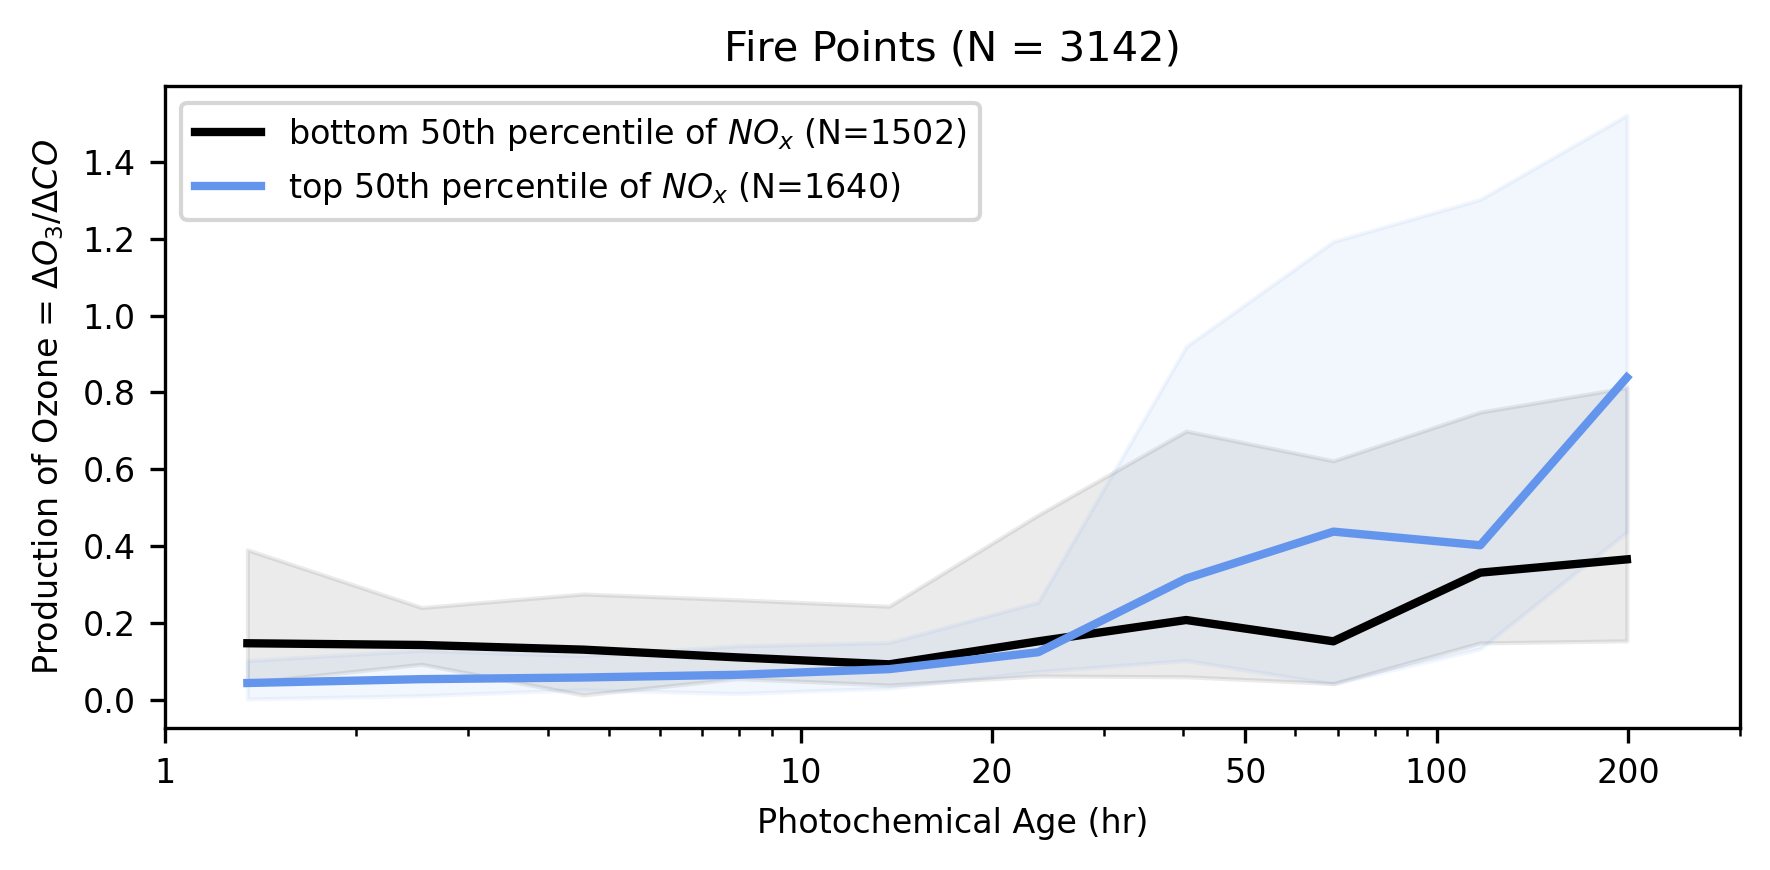

In [11]:
# first method
matplotlib.rcParams['font.family'] = ['sans-serif']

split_by = 'NOx' 
y_var = 'O3/CO'

tmp = df#[(df['O3/CO']>0)]

fire = tmp[(tmp['regime'] == 'fire')]

fig, ax = plt.subplots(figsize=(6, 3), dpi=300)

log_bins = np.logspace(-0,2.3,11)

grouped_fire = fire.groupby(pd.cut(fire[split_by], np.nanpercentile(fire[split_by], [0,50,100]), include_lowest=True, labels=['bottom', 'top']))
bottom = grouped_fire.get_group('bottom')
top = grouped_fire.get_group('top')

# binned_scatterplot(bottom['age'], bottom[y_var], log_bins, show_raw=True, label=r'bottom 50th percentile of $\theta$ (N={})'.format(len(bottom[['age',y_var,split_by]].dropna())), c='k', marker='o', ax=axs[0])
bin_result = binned_statistic(bottom['age'].values, bottom['O3/CO'].values, statistic=lambda y:np.nanmedian(y), bins=log_bins,)
tenth_result = binned_statistic(bottom['age'].values, bottom['O3/CO'].values, statistic=lambda y:np.nanpercentile(y,16), bins=log_bins,)
ninetieth_result = binned_statistic(bottom['age'].values, bottom['O3/CO'].values, statistic=lambda y:np.nanpercentile(y,84), bins=log_bins,)
count_result = binned_statistic(bottom['age'].values, bottom['O3/CO'].values, statistic='count', bins=log_bins,)
bin_edges = (bin_result.bin_edges)
bin_centers = bin_result.bin_edges[1:] - (abs(bin_result.bin_edges[0]-bin_result.bin_edges[1]))/2

# print("bottom", count_result.statistic)

# ax.scatter(tmp['NOx'], tmp['O3/CO'], color=colors['fire'], alpha=0.1)
p = ax.plot(bin_centers, bin_result.statistic, label=r'bottom 50th percentile of $NO_x$ (N={})'.format(len(bottom[['age',y_var,split_by]].dropna())), color='k', linewidth=2)
ax.fill_between(bin_centers, tenth_result.statistic, ninetieth_result.statistic, alpha=0.08, color='k')

bin_result = binned_statistic(top['age'].values, top['O3/CO'].values, statistic=lambda y:np.nanmedian(y), bins=log_bins,)
tenth_result = binned_statistic(top['age'].values, top['O3/CO'].values, statistic=lambda y:np.nanpercentile(y,16), bins=log_bins,)
ninetieth_result = binned_statistic(top['age'].values, top['O3/CO'].values, statistic=lambda y:np.nanpercentile(y,84), bins=log_bins,)
count_result = binned_statistic(top['age'].values, top['O3/CO'].values, statistic='count', bins=log_bins,)
bin_edges = (bin_result.bin_edges)
bin_centers = bin_result.bin_edges[1:] - (abs(bin_result.bin_edges[0]-bin_result.bin_edges[1]))/2

# print("top",count_result.statistic)

p = ax.plot(bin_centers, bin_result.statistic, label=r'top 50th percentile of $NO_x$ (N={})'.format(len(top[['age',y_var,split_by]].dropna())), color='cornflowerblue', linewidth=2)
ax.fill_between(bin_centers, tenth_result.statistic, ninetieth_result.statistic, alpha=0.08, color='cornflowerblue')
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=8)

ax.set_xscale('log')
ax.set_title('Fire Points (N = {})'.format(len(fire[['age',y_var,split_by]].dropna())), fontsize=10)

ax.set_ylabel(r'Production of Ozone = $\Delta O_3 / \Delta CO$', fontsize=8)
ax.set_xlabel('Photochemical Age (hr)', fontsize=8)

ax.set_xticks([1, 10, 20, 50, 100, 200])
ax.set_xticklabels([1, 10, 20, 50, 100, 200], fontsize=8)

# axs[0].vlines(20, 0,160)

# axs[0].set_ylim(-0.4,2)

# urban

ax.set_xlim(1, 3e2)

ax.legend(fontsize=8, loc="upper left")

fig.tight_layout()

#save figure as pdf
plt.savefig("../../figures/supfig_07.pdf", bbox_inches='tight', dpi=300)

### Figure S8

In [7]:
df['CH2O/NO2'] = df['CH2O']/df['NO2']

/home/jpalmo/.conda/envs/o3fire/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


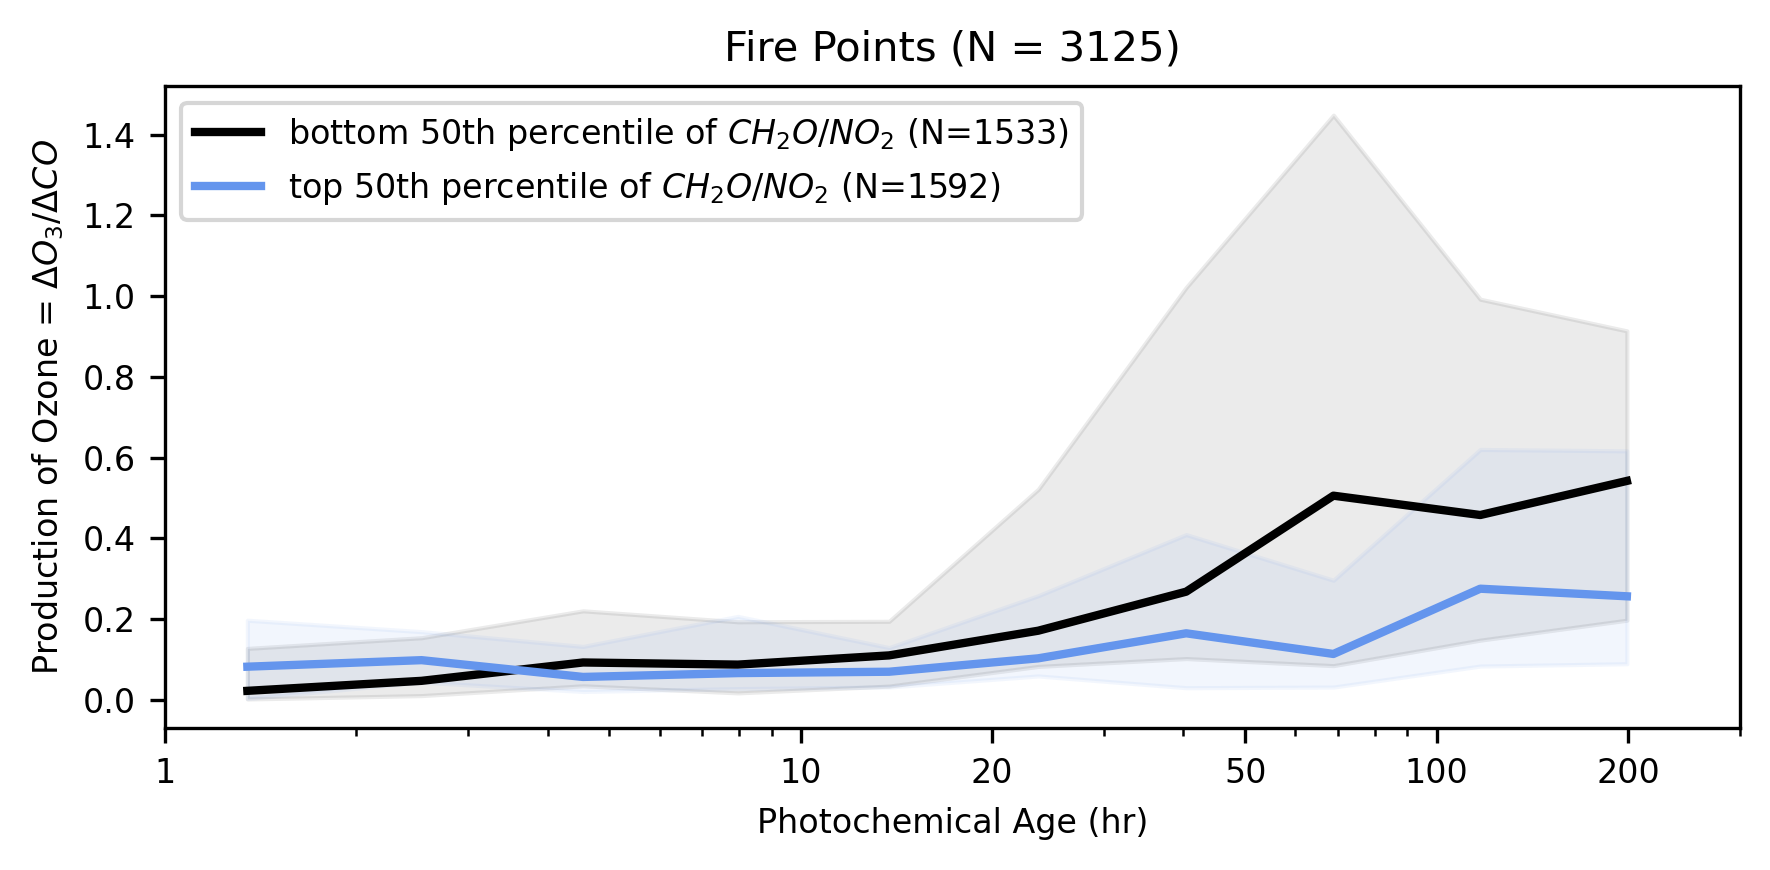

In [10]:
# first method
matplotlib.rcParams['font.family'] = ['sans-serif']

split_by = 'CH2O/NO2' 
y_var = 'O3/CO'

tmp = df#[(df['O3/CO']>0)]

fire = tmp[(tmp['regime'] == 'fire')]

fig, ax = plt.subplots(figsize=(6, 3), dpi=300)

log_bins = np.logspace(-0,2.3,11)

grouped_fire = fire.groupby(pd.cut(fire[split_by], np.nanpercentile(fire[split_by], [0,50,100]), include_lowest=True, labels=['bottom', 'top']))
bottom = grouped_fire.get_group('bottom')
top = grouped_fire.get_group('top')

# binned_scatterplot(bottom['age'], bottom[y_var], log_bins, show_raw=True, label=r'bottom 50th percentile of $\theta$ (N={})'.format(len(bottom[['age',y_var,split_by]].dropna())), c='k', marker='o', ax=axs[0])
bin_result = binned_statistic(bottom['age'].values, bottom['O3/CO'].values, statistic=lambda y:np.nanmedian(y), bins=log_bins,)
tenth_result = binned_statistic(bottom['age'].values, bottom['O3/CO'].values, statistic=lambda y:np.nanpercentile(y,16), bins=log_bins,)
ninetieth_result = binned_statistic(bottom['age'].values, bottom['O3/CO'].values, statistic=lambda y:np.nanpercentile(y,84), bins=log_bins,)
count_result = binned_statistic(bottom['age'].values, bottom['O3/CO'].values, statistic='count', bins=log_bins,)
bin_edges = (bin_result.bin_edges)
bin_centers = bin_result.bin_edges[1:] - (abs(bin_result.bin_edges[0]-bin_result.bin_edges[1]))/2

# print("bottom", count_result.statistic)

# ax.scatter(tmp['NOx'], tmp['O3/CO'], color=colors['fire'], alpha=0.1)
p = ax.plot(bin_centers, bin_result.statistic, label=r'bottom 50th percentile of $CH_2O/NO_2$ (N={})'.format(len(bottom[['age',y_var,split_by]].dropna())), color='k', linewidth=2)
ax.fill_between(bin_centers, tenth_result.statistic, ninetieth_result.statistic, alpha=0.08, color='k')

bin_result = binned_statistic(top['age'].values, top['O3/CO'].values, statistic=lambda y:np.nanmedian(y), bins=log_bins,)
tenth_result = binned_statistic(top['age'].values, top['O3/CO'].values, statistic=lambda y:np.nanpercentile(y,16), bins=log_bins,)
ninetieth_result = binned_statistic(top['age'].values, top['O3/CO'].values, statistic=lambda y:np.nanpercentile(y,84), bins=log_bins,)
count_result = binned_statistic(top['age'].values, top['O3/CO'].values, statistic='count', bins=log_bins,)
bin_edges = (bin_result.bin_edges)
bin_centers = bin_result.bin_edges[1:] - (abs(bin_result.bin_edges[0]-bin_result.bin_edges[1]))/2

# print("top",count_result.statistic)

p = ax.plot(bin_centers, bin_result.statistic, label=r'top 50th percentile of $CH_2O/NO_2$ (N={})'.format(len(top[['age',y_var,split_by]].dropna())), color='cornflowerblue', linewidth=2)
ax.fill_between(bin_centers, tenth_result.statistic, ninetieth_result.statistic, alpha=0.08, color='cornflowerblue')
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=8)

ax.set_xscale('log')
ax.set_title('Fire Points (N = {})'.format(len(fire[['age',y_var,split_by]].dropna())), fontsize=10)

ax.set_ylabel(r'Production of Ozone = $\Delta O_3 / \Delta CO$', fontsize=8)
ax.set_xlabel('Photochemical Age (hr)', fontsize=8)

ax.set_xticks([1, 10, 20, 50, 100, 200])
ax.set_xticklabels([1, 10, 20, 50, 100, 200], fontsize=8)

# axs[0].vlines(20, 0,160)

# axs[0].set_ylim(-0.4,2)

# urban

ax.set_xlim(1, 3e2)

ax.legend(fontsize=8, loc="upper left")

fig.tight_layout()

#save figure as pdf
plt.savefig("../../figures/supfig_08.pdf", bbox_inches='tight', dpi=300)